In [278]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error,r2_score,accuracy_score,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier

# Data Exploration

In [8]:
df = pd.read_csv('H:\AiQuest\kaggle\survey lung cancer.csv')

In [9]:
df.head(10)

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO
5,F,75,1,2,1,1,2,2,2,2,1,2,2,1,1,YES
6,M,52,2,1,1,1,1,2,1,2,2,2,2,1,2,YES
7,F,51,2,2,2,2,1,2,2,1,1,1,2,2,1,YES
8,F,68,2,1,2,1,1,2,1,1,1,1,1,1,1,NO
9,M,53,2,2,2,2,2,1,2,1,2,1,1,2,2,YES


# 1. Dataset Overview:
#### This dataset is focused on lung cancer prediction. It contains various personal and health-related characteristics of individuals, which may be helpful in identifying potential lung cancer risks. The dataset includes information such as gender, age, smoking habits, anxiety levels, chronic diseases, and other related features.
#### Value Mapping for Binary Features:
#### Upon analysis, it was identified that several columns use numeric representations for binary responses:
#### '1' represents 'Yes'
#### '2' represents 'No'
#### For consistent data processing and easier interpretation, we will proceed by treating all occurrences of 1 as 'Yes' and 2 as 'No' in all relevant columns throughout our analysis.

## EDA 

In [12]:
print('The Shape of the Data Frame :\n',df.shape)

The Shape of the Data Frame :
 (309, 16)


In [13]:
print('The Statical Review of the Data :\n')
print(df.describe())

The Statical Review of the Data :

              AGE     SMOKING  YELLOW_FINGERS     ANXIETY  PEER_PRESSURE  \
count  309.000000  309.000000      309.000000  309.000000     309.000000   
mean    62.673139    1.563107        1.569579    1.498382       1.501618   
std      8.210301    0.496806        0.495938    0.500808       0.500808   
min     21.000000    1.000000        1.000000    1.000000       1.000000   
25%     57.000000    1.000000        1.000000    1.000000       1.000000   
50%     62.000000    2.000000        2.000000    1.000000       2.000000   
75%     69.000000    2.000000        2.000000    2.000000       2.000000   
max     87.000000    2.000000        2.000000    2.000000       2.000000   

       CHRONIC DISEASE    FATIGUE     ALLERGY     WHEEZING  ALCOHOL CONSUMING  \
count       309.000000  309.000000  309.000000  309.000000         309.000000   
mean          1.504854    1.673139    1.556634    1.556634           1.556634   
std           0.500787    0.469827   

In [14]:
print('The Information of the Data :\n')
df.info()

The Information of the Data :

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int6

In [15]:
categorical_cols = df.columns
print('The Unique Values of the categorical columns and the columns list :\n')
for col in categorical_cols.drop('AGE'):
    print(df[col].value_counts())

The Unique Values of the categorical columns and the columns list :

GENDER
M    162
F    147
Name: count, dtype: int64
SMOKING
2    174
1    135
Name: count, dtype: int64
YELLOW_FINGERS
2    176
1    133
Name: count, dtype: int64
ANXIETY
1    155
2    154
Name: count, dtype: int64
PEER_PRESSURE
2    155
1    154
Name: count, dtype: int64
CHRONIC DISEASE
2    156
1    153
Name: count, dtype: int64
FATIGUE 
2    208
1    101
Name: count, dtype: int64
ALLERGY 
2    172
1    137
Name: count, dtype: int64
WHEEZING
2    172
1    137
Name: count, dtype: int64
ALCOHOL CONSUMING
2    172
1    137
Name: count, dtype: int64
COUGHING
2    179
1    130
Name: count, dtype: int64
SHORTNESS OF BREATH
2    198
1    111
Name: count, dtype: int64
SWALLOWING DIFFICULTY
1    164
2    145
Name: count, dtype: int64
CHEST PAIN
2    172
1    137
Name: count, dtype: int64
LUNG_CANCER
YES    270
NO      39
Name: count, dtype: int64


In [16]:
print('The Age Ratio :\n')
print('The Average value of Age :',df['AGE'].mean())
print('The Highest value of Age :',df['AGE'].max())
print('The Lowest value of Age :',df['AGE'].min())

The Age Ratio :

The Average value of Age : 62.67313915857605
The Highest value of Age : 87
The Lowest value of Age : 21


In [17]:
cancer_patient = df[df['LUNG_CANCER'] == 'YES']
male_cancer = cancer_patient[cancer_patient['GENDER'] == 'M'].value_counts().sum()
cancer_patient = df[df['LUNG_CANCER'] == 'YES']
female_cancer = cancer_patient[cancer_patient['GENDER'] == 'F'].value_counts().sum()
print("Lung Cancer Status among Male Patients :\n",male_cancer)
print("Lung Cancer Status among Female Patients :\n",female_cancer)

Lung Cancer Status among Male Patients :
 145
Lung Cancer Status among Female Patients :
 125


In [18]:
cancer_patient = df[df['LUNG_CANCER'] == 'YES']

male_cancer_high = cancer_patient[cancer_patient['GENDER'] == 'M']['AGE'].max()
male_cancer_low = cancer_patient[cancer_patient['GENDER'] == 'M']['AGE'].min()
female_cancer_high = cancer_patient[cancer_patient['GENDER'] == 'F']['AGE'].max()
female_cancer_low = cancer_patient[cancer_patient['GENDER'] == 'F']['AGE'].min()

print('Lung Cancer effected patiens age distributions:\n')

print('Male Cancer effected highest age :',male_cancer_high)
print('Male Cancer effected lowest age :',male_cancer_low)
print('Female Cancer effected highest age :',female_cancer_high)
print('Female Cancer effected highest age :',female_cancer_low)

Lung Cancer effected patiens age distributions:

Male Cancer effected highest age : 79
Male Cancer effected lowest age : 39
Female Cancer effected highest age : 81
Female Cancer effected highest age : 38


# 1.Dataset Shape:
#### Total Rows (samples): 309
#### Total Columns (features): 16
#### This indicates that the dataset includes 309 individual records with 16 attributes each.

# 2.Null Value Check:
#### There are no missing (null) values present in the dataset. All entries are complete, which simplifies preprocessing and analysis.

# 3.Data Types of Columns:

#### Columns 2 to 14 are of integer (int) data type, which generally represent categorical or binary values encoded as integers.
#### Column 1 (Gender) and Column 16 (Lung Cancer Status) are of object data type, meaning they contain string or categorical values.

# 4.Gender Distribution:

#### Male: 162 individuals
#### Female: 147 individuals

#### This indicates a fairly balanced gender distribution, with a slightly higher number of male participants.

# 5.Age Statistics:
    
#### Average Age: 62.67 years
#### Maximum Age: 87 years
#### Minimum Age: 21 years
    
#### The participants' ages range widely, from young adults to elderly individuals, with the average age skewed toward the higher side, which is typical for lung cancer risk populations.

# 6.Age Distribution Among Lung Cancer Affected Patients:
#### Among individuals who are identified as lung cancer patients in the dataset:
### Male Patients:
#### Highest Age: 63 years
#### Lowest Age: 39 years
### Female Patients:
#### Highest Age: 81 years
#### Lowest Age: 38 years
    
#### This breakdown shows that the female patients affected by lung cancer tend to include both older and younger individuals than the male group, where the age range is slightly narrower.

# 7.According to the data:

#### 145 male patients were diagnosed with lung cancer.
#### 125 female patients were diagnosed with lung cancer.



# VISUALIZATON

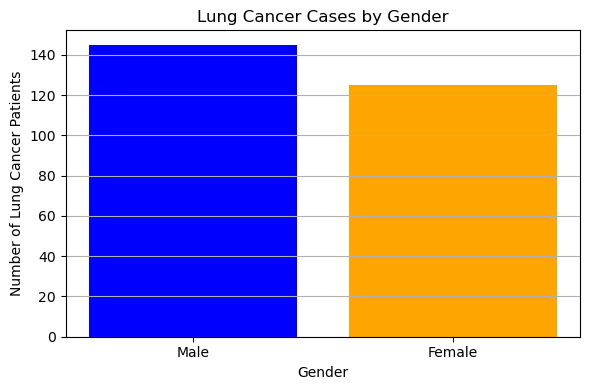

In [21]:
gender = ['Male', 'Female']
cancer_cases = [145, 125]

plt.figure(figsize=(6, 4))
plt.bar(gender, cancer_cases, color=['blue', 'orange'])

plt.title('Lung Cancer Cases by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Lung Cancer Patients')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


The Age Distribution :



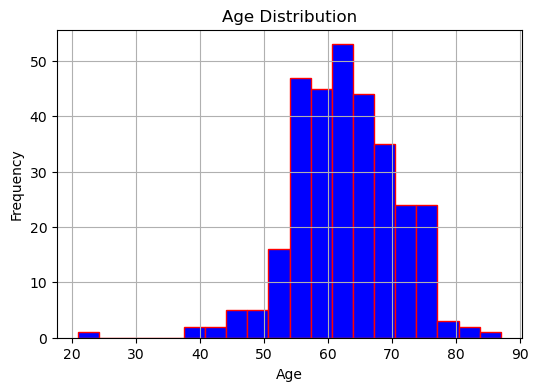

In [22]:
print("The Age Distribution :\n")
plt.figure(figsize=(6,4))
plt.hist(df['AGE'], bins=20,color='blue',edgecolor='r')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)

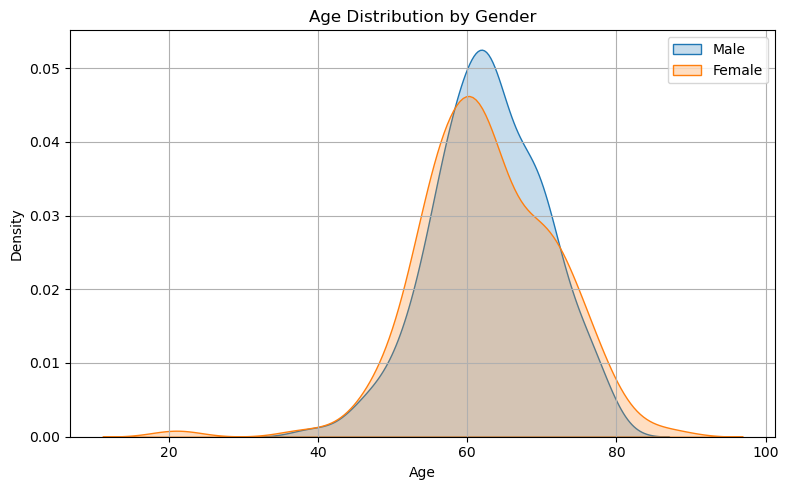

In [23]:
plt.figure(figsize=(8, 5))

sns.kdeplot(data=df[df['GENDER'] == 'M'], x='AGE', label='Male', shade=True)
sns.kdeplot(data=df[df['GENDER'] == 'F'], x='AGE', label='Female', shade=True)

plt.title('Age Distribution by Gender')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

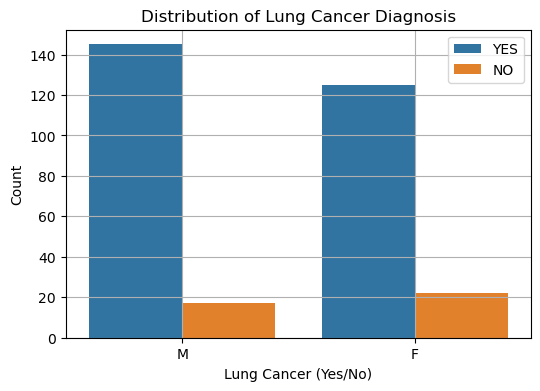

In [24]:
plt.figure(figsize=(6,4))
sns.countplot(x='GENDER', data=df, hue='LUNG_CANCER')
plt.title('Distribution of Lung Cancer Diagnosis')
plt.xlabel('Lung Cancer (Yes/No)')
plt.ylabel('Count')
plt.grid(True)
plt.legend()
plt.show()

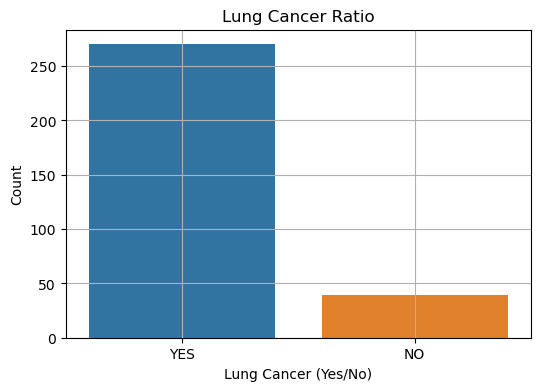

In [25]:
plt.figure(figsize=(6,4))
sns.countplot(x='LUNG_CANCER', data=df, hue='LUNG_CANCER')
plt.title('Lung Cancer Ratio')
plt.xlabel('Lung Cancer (Yes/No)')
plt.ylabel('Count')
plt.grid(True)
plt.show()

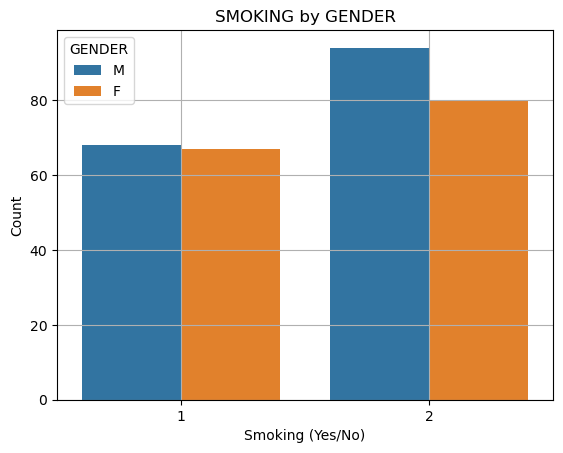

In [28]:
sns.countplot(x='SMOKING', data=df, hue = 'GENDER')
plt.title('SMOKING by GENDER')
plt.xlabel('Smoking (Yes/No)')
plt.ylabel('Count')
plt.grid(True)
plt.show()

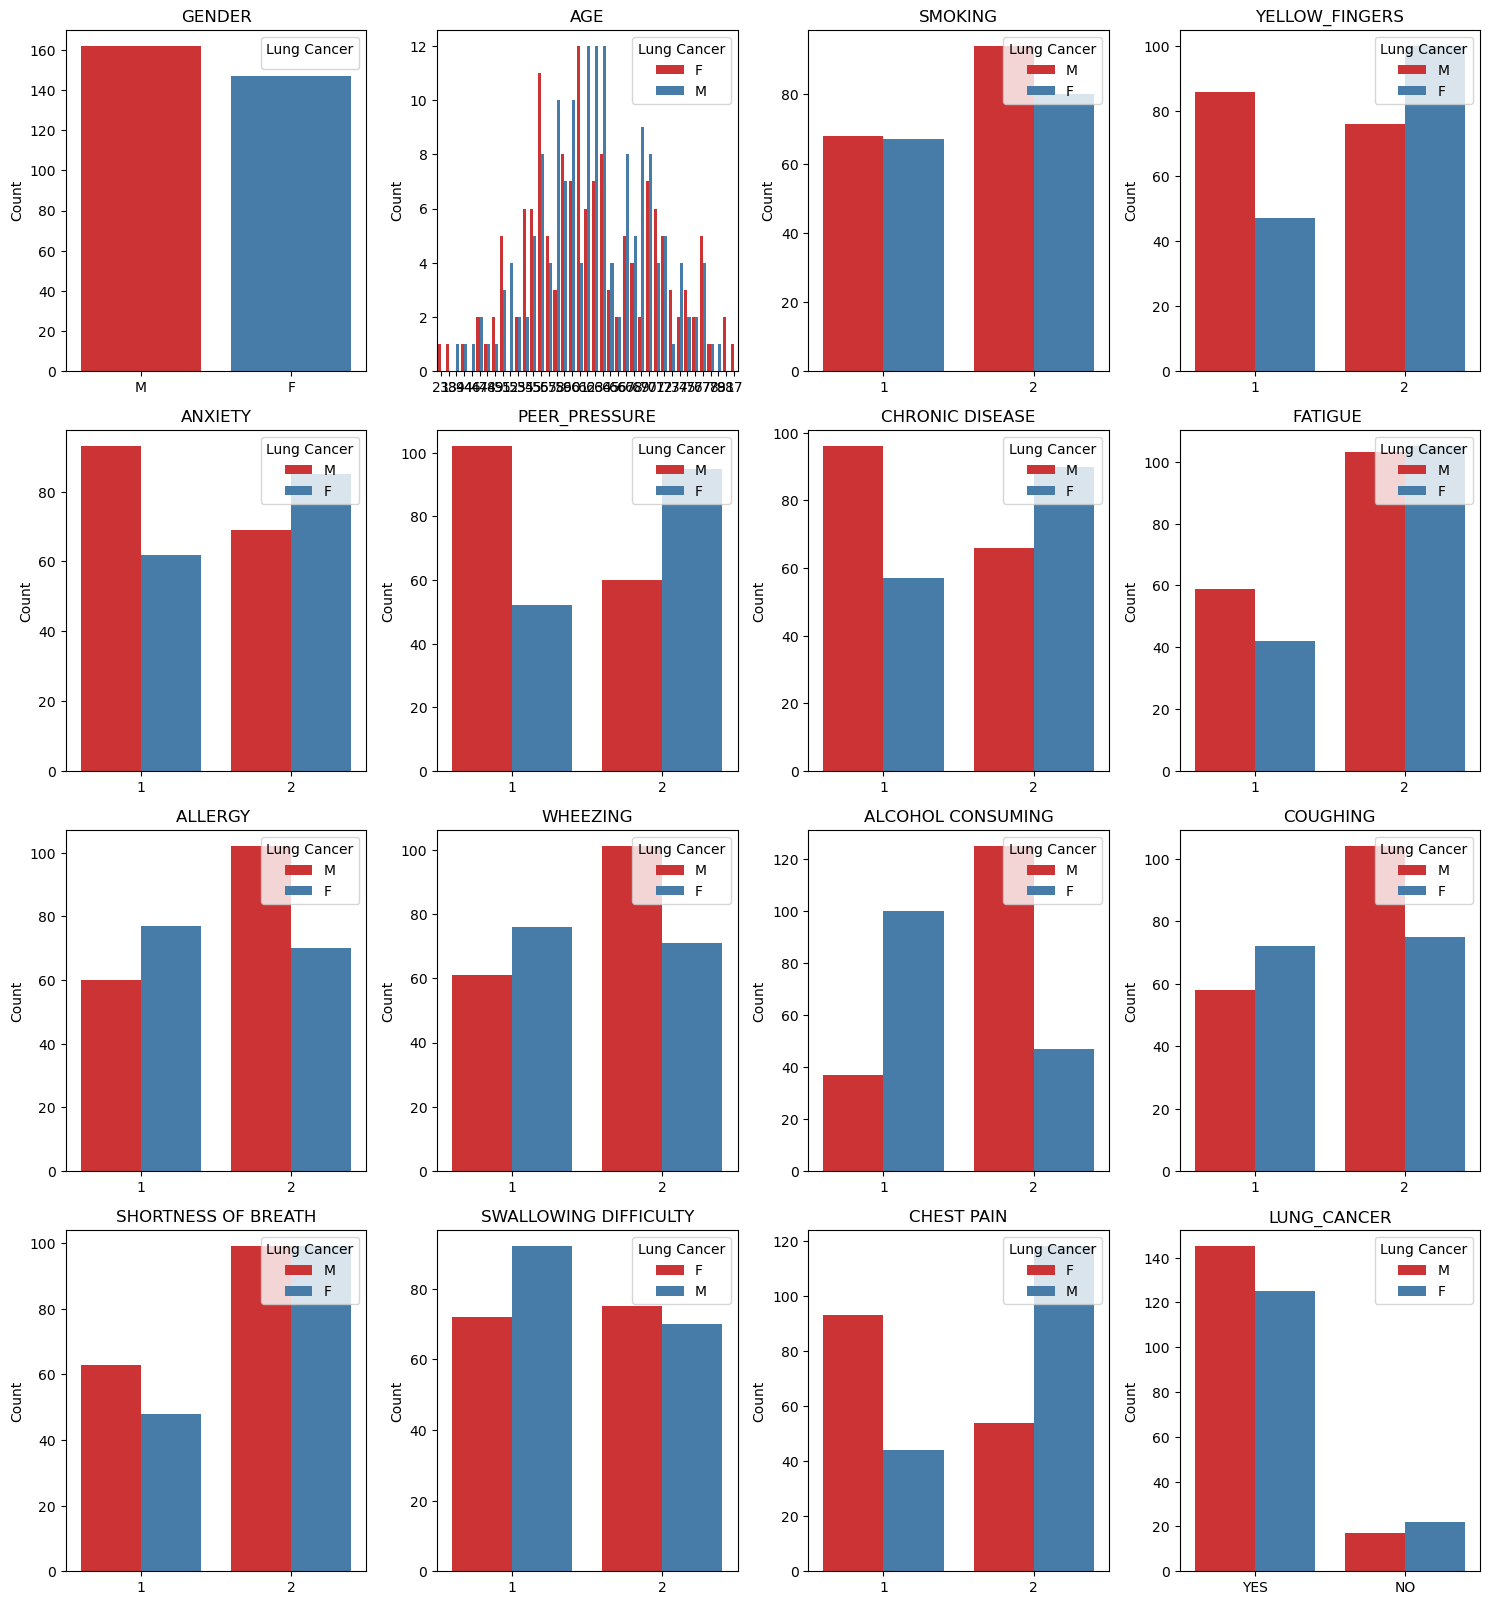

In [35]:
cat_features = df[:-1]
n_cols = 4 
n_rows = (len(cat_features) + n_cols - 1) // n_cols

plt.figure(figsize=(15, 4 * n_rows)) 
for i, col in enumerate(cat_features):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.countplot(x=col, hue='GENDER', data=df, palette='Set1')
    plt.title(f'{col}')
    plt.xlabel('')
    plt.ylabel('Count')
    plt.legend(title='Lung Cancer', loc='upper right')
plt.tight_layout()
plt.show()

# What We Learned from Data Visualization:

### Total Lung Cancer Patients by Gender
#### ➤ Visualization showed that 145 males and 125 females are diagnosed with lung cancer.
#### ➤ This indicates that males are more affected than females in this dataset.

### Gender Distribution in Dataset
#### ➤ A bar chart showed that the dataset contains 162 males and 147 females in total.

### Age Distribution
#### ➤ We learned the average age of all patients is 62.67 years.
#### ➤ Highest age: 87, Lowest age: 21.
#### ➤ Visualization helped identify the spread of age across different genders.

### Age Range of Lung Cancer Patients
#### ➤ Among lung cancer patients:
#### • Male age range: 39 to 63 years
#### • Female age range: 38 to 81 years
#### ➤ This shows that females have a wider age range among affected patients.

### Data Type Distribution
#### ➤ Columns 2 to 14 are integer type, while column 1 (GENDER) and 16 (LUNG_CANCER) are object type.
#### ➤ This helped choose correct visualization types (like countplot, barplot, piechart).

The most important characteristics of Ling Cancer :



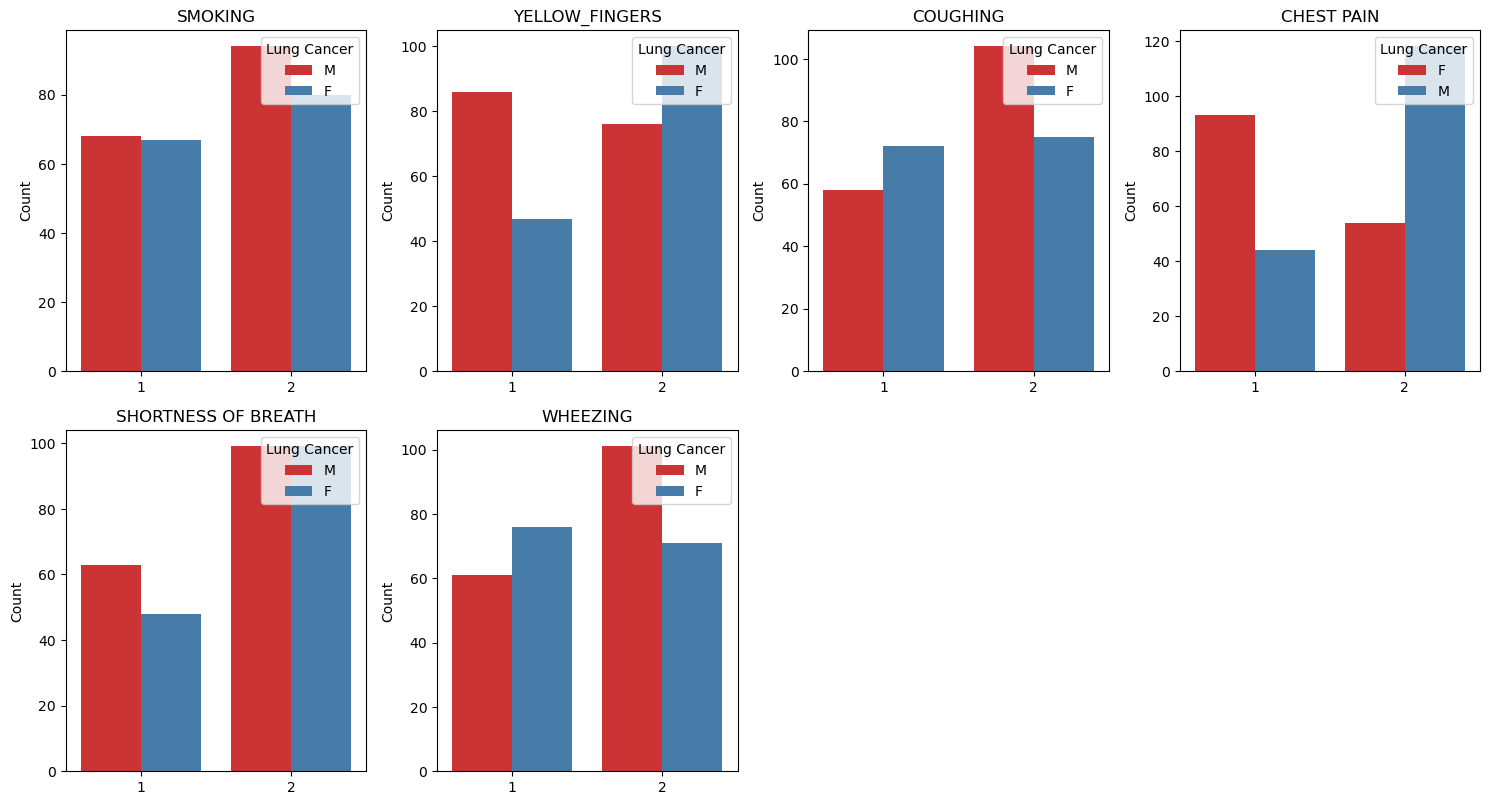

In [39]:
print('The most important characteristics of Ling Cancer :\n')
cat_features = df[['SMOKING','YELLOW_FINGERS','COUGHING','CHEST PAIN','SHORTNESS OF BREATH','WHEEZING']]
n_cols = 4
n_rows = (len(cat_features) + n_cols - 1) // n_cols

plt.figure(figsize=(15, 4 * n_rows)) 
for i, col in enumerate(cat_features):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.countplot(x=col, hue='GENDER', data=df, palette='Set1')
    plt.title(f'{col}')
    plt.xlabel('')
    plt.ylabel('Count')
    plt.legend(title='Lung Cancer', loc='upper right')
plt.tight_layout()
plt.show()

# Description of Most Common Characteristics of Lung Cancer
### The visual analysis confirms that smoking and related symptoms such as yellow fingers, chronic coughing, chest pain, shortness of breath, and wheezing are the most common and significant characteristics found among lung cancer patients in this dataset. These features can be vital indicators in early diagnosis and prediction models.

# Data Preprocessing

## Ordinal Encoder

In [48]:
oe = OrdinalEncoder()

In [50]:
df['GENDER'] = oe.fit_transform(df[['GENDER']]).astype(int)

In [51]:
df['LUNG_CANCER'] = oe.fit_transform(df[['LUNG_CANCER']]).astype(int)

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   GENDER                 309 non-null    int32
 1   AGE                    309 non-null    int64
 2   SMOKING                309 non-null    int64
 3   YELLOW_FINGERS         309 non-null    int64
 4   ANXIETY                309 non-null    int64
 5   PEER_PRESSURE          309 non-null    int64
 6   CHRONIC DISEASE        309 non-null    int64
 7   FATIGUE                309 non-null    int64
 8   ALLERGY                309 non-null    int64
 9   WHEEZING               309 non-null    int64
 10  ALCOHOL CONSUMING      309 non-null    int64
 11  COUGHING               309 non-null    int64
 12  SHORTNESS OF BREATH    309 non-null    int64
 13  SWALLOWING DIFFICULTY  309 non-null    int64
 14  CHEST PAIN             309 non-null    int64
 15  LUNG_CANCER            309 non-null    i

In [53]:
df

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1
1,1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1
2,0,59,1,1,1,2,1,2,1,2,1,2,2,1,2,0
3,1,63,2,2,2,1,1,1,1,1,2,1,1,2,2,0
4,0,63,1,2,1,1,1,1,1,2,1,2,2,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,0,56,1,1,1,2,2,2,1,1,2,2,2,2,1,1
305,1,70,2,1,1,1,1,2,2,2,2,2,2,1,2,1
306,1,58,2,1,1,1,1,1,2,2,2,2,1,1,2,1
307,1,67,2,1,2,1,1,2,2,1,2,2,2,1,2,1


In [182]:
x = df.drop('LUNG_CANCER',axis = 1)

In [184]:
y = df[['LUNG_CANCER']]

## Train Test Split

In [57]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=42)

## Implementing SMOTE

In [189]:
smote = SMOTE(random_state=42)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)

# XGBOOST Classifier

In [281]:
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [283]:
xgb_prediction = xgb.predict(x_test)

In [285]:
xgb.score(x_train,y_train)

0.9953703703703703

In [287]:
xgb.score(x_test,y_test)

0.967741935483871

In [297]:
print(classification_report(y_test, xgb_prediction))

              precision    recall  f1-score   support

           0       1.00      0.57      0.73         7
           1       0.97      1.00      0.98        86

    accuracy                           0.97        93
   macro avg       0.98      0.79      0.86        93
weighted avg       0.97      0.97      0.96        93



In [293]:
xgb_accuracy = accuracy_score(y_test,xgb_prediction)
print(xgb_accuracy)

0.967741935483871


In [301]:
xgb_mse = mean_squared_error(y_test,xgb_prediction)
print(xgb_mse)

0.03225806451612903


# Random Forest Classifier

In [192]:
rfc = RandomForestClassifier()

In [194]:
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [196]:
rfc_prediction = rfc.predict(x_test)

In [198]:
rfc.score(x_train,y_train)

0.9953703703703703

In [200]:
rfc.score(x_test,y_test)

0.967741935483871

In [202]:
rfc_mse = mean_squared_error(y_test,rfc_prediction)
rfc_mse

0.03225806451612903

In [206]:
rfc_accuracy = accuracy_score(y_test,rfc_prediction)
print(rfc_accuracy)

0.967741935483871


In [210]:
rfc_classification = classification_report(y_test,rfc_prediction)
print('The Classification Report :\n',rfc_classification)

The Classification Report :
               precision    recall  f1-score   support

           0       0.83      0.71      0.77         7
           1       0.98      0.99      0.98        86

    accuracy                           0.97        93
   macro avg       0.91      0.85      0.88        93
weighted avg       0.97      0.97      0.97        93



# Logistic Regression

In [213]:
lr = LogisticRegression()

In [215]:
lr.fit(x_train,y_train)

LogisticRegression()

In [217]:
lr_prediction = lr.predict(x_test)
lr_prediction

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1])

In [219]:
lr.score(x_train,y_train)

0.9074074074074074

In [221]:
lr.score(x_test,y_test)

0.978494623655914

In [307]:
lr_r2 = r2_score(y_test,lr_prediction)
print(lr_r2)

0.691029900332226


In [223]:
lr_mse = mean_squared_error(y_test,lr_prediction)
print('Logistic Regression Mean Squared Error is :\n',lr_mse)

Logistic Regression Mean Squared Error is :
 0.021505376344086023


In [227]:
rfc_classification = classification_report(y_test,lr_prediction)
print(rfc_classification)

              precision    recall  f1-score   support

           0       1.00      0.71      0.83         7
           1       0.98      1.00      0.99        86

    accuracy                           0.98        93
   macro avg       0.99      0.86      0.91        93
weighted avg       0.98      0.98      0.98        93



# KNeighborsClassifier

In [230]:
knn = KNeighborsClassifier(n_neighbors=5)

In [232]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [234]:
knn_prediction = knn.predict(x_test)
knn_prediction

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1])

In [236]:
knn.score(x_train,y_train)

0.8935185185185185

In [238]:
knn.score(x_test,y_test)

0.9354838709677419

In [240]:
knn_mse = mean_squared_error(y_test,knn_prediction)
print('KNN Classifier Mean Squared Error :\n',knn_mse)

KNN Classifier Mean Squared Error :
 0.06451612903225806


In [244]:
knn_classification = classification_report(y_test,knn_prediction)
print(knn_classification )

              precision    recall  f1-score   support

           0       0.67      0.29      0.40         7
           1       0.94      0.99      0.97        86

    accuracy                           0.94        93
   macro avg       0.81      0.64      0.68        93
weighted avg       0.92      0.94      0.92        93



# Decision Tree Classifier

In [247]:
dtc = DecisionTreeClassifier()

In [249]:
dtc.fit(x_train,y_train)

DecisionTreeClassifier()

In [251]:
dtc_prediction = dtc.predict(x_test)
dtc_prediction

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1])

In [253]:
dtc.score(x_train,y_train)

0.9953703703703703

In [255]:
dtc.score(x_test,y_test)

0.9354838709677419

In [257]:
dtc_mse = mean_squared_error(y_test,dtc_prediction)
dtc_mse

0.06451612903225806

In [259]:
dtc_classification = classification_report(y_test,dtc_prediction)
print(dtc_classification)

              precision    recall  f1-score   support

           0       0.56      0.71      0.62         7
           1       0.98      0.95      0.96        86

    accuracy                           0.94        93
   macro avg       0.77      0.83      0.79        93
weighted avg       0.94      0.94      0.94        93



# XGBoost Classifier
#### XGBoost provides a training score of 0.99 and a test score of 0.96, matching the performance of the Random Forest model. The MSE is also 0.032, indicating low error rates. XGBoost is known for its efficiency and power, and the results here confirm its reliability. Like Random Forest, it may slightly overfit, but the test accuracy remains high.

# Random Forest Classifier
#### The Random Forest model has a high training accuracy of 0.99, showing it learns the training data well. Its test accuracy is also strong at 0.96. The MSE is low at 0.032, which means prediction errors are minimal. Although there is a slight difference between training and testing scores, it still shows strong and consistent performance.

# Logistic Regression
#### Logistic Regression gives a training accuracy of 0.90 and a high test accuracy of 0.97. This indicates excellent generalization and no overfitting. It also has the lowest MSE of 0.021, meaning it makes the fewest errors in prediction among all the models. The R² score is 0.69, showing a decent level of explained variance. This model performs the best overall in terms of accuracy and error minimization.

# K-Nearest Neighbors (KNN) Classifier
#### The KNN model has a training score of 0.89, which is lower compared to other models. However, its test accuracy is 0.93, equal to the Decision Tree, indicating better generalization. The MSE is also 0.064. The relatively lower training accuracy suggests it may underfit slightly, but the stable test score shows it performs reliably on new data.

# Decision Tree Classifier
#### The Decision Tree model shows a very high training accuracy of 0.99, which indicates that it fits the training data almost perfectly. However, the test accuracy drops slightly to 0.93, suggesting a possibility of overfitting. The mean squared error (MSE) is 0.064, which indicates a moderate prediction error. Overall, while it performs well on the test set, the gap between train and test scores may be a concern.

# Best Model Selection
#### Logistic Regression is the best-performing model overall. It achieved the highest test accuracy of 0.97, which means it performs very well on unseen data.It has the lowest mean squared error of 0.021. This indicates that the model makes fewer mistakes in prediction compared to the others.The training score is 0.90, which is close to the test score. This shows that the model is not overfitting or underfitting and generalizes well.
#### The R² score is 0.69, which means it explains a good portion of the variance in the data. This makes the model reliable for both classification and interpretability.
#### Among all the models, Logistic Regression gives the most consistent and accurate results with the lowest error.

#### Although XGBoost and Random Forest are very powerful models, the simplicity and performance of Logistic Regression together make it the best choice.

# The Visualization of the Accuracy Score

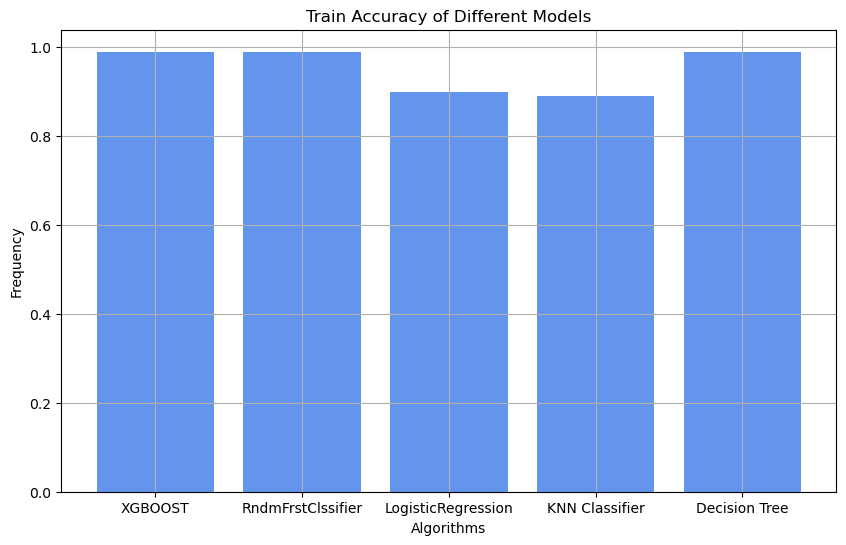

In [341]:
model = ['XGBOOST','RndmFrstClssifier','LogisticRegression','KNN Classifier','Decision Tree']
accuracy = [0.99,0.99,0.90,0.89,0.99]

plt.figure(figsize=(10,6))
plt.bar(model,accuracy,color='cornflowerblue')
plt.xlabel('Algorithms')
plt.ylabel('Frequency')
plt.title('Train Accuracy of Different Models')
plt.grid(True)

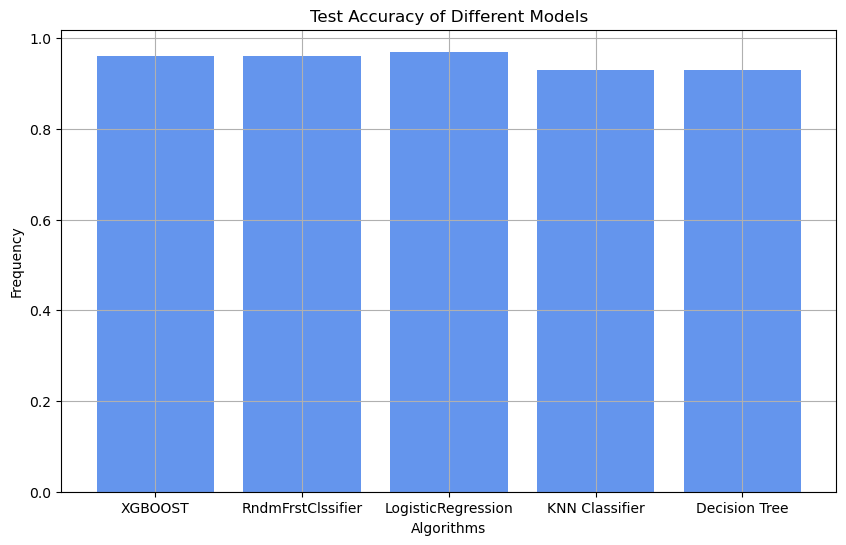

In [339]:
model = ['XGBOOST','RndmFrstClssifier','LogisticRegression','KNN Classifier','Decision Tree']
accuracy = [0.96,0.96,0.97,0.93,0.93]

plt.figure(figsize=(10,6))
plt.bar(model,accuracy,color='cornflowerblue')
plt.xlabel('Algorithms')
plt.ylabel('Frequency')
plt.title('Test Accuracy of Different Models')
plt.grid(True)

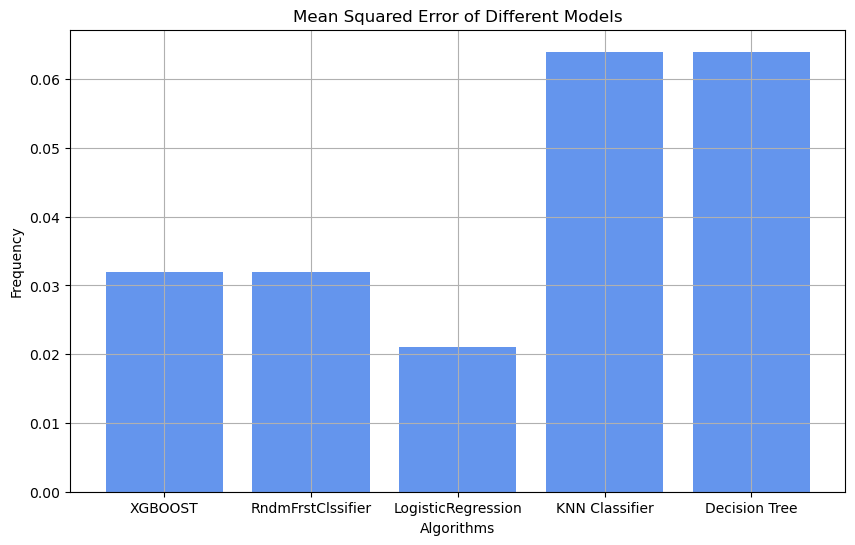

In [343]:
model = ['XGBOOST','RndmFrstClssifier','LogisticRegression','KNN Classifier','Decision Tree']
accuracy = [0.032,0.032,0.021,0.064,0.064]

plt.figure(figsize=(10,6))
plt.bar(model,accuracy,color='cornflowerblue')
plt.xlabel('Algorithms')
plt.ylabel('Frequency')
plt.title('Mean Squared Error of Different Models')
plt.grid(True)

# Heatmap of the Lung Cancer DataFrame
#### The heatmap of the DataFrame from the lung cancer survey dataset shows the correlation between all numerical features. It helps to identify which features are strongly related to each other. Features like "AGE", "SMOKING", and "ALCOHOL CONSUMING" may show high correlation with "LUNG_CANCER". Strong positive or negative correlations are highlighted with darker colors. This visualization is useful for feature selection and understanding how different variables interact in the dataset.

In [272]:
correlation = df.corr()

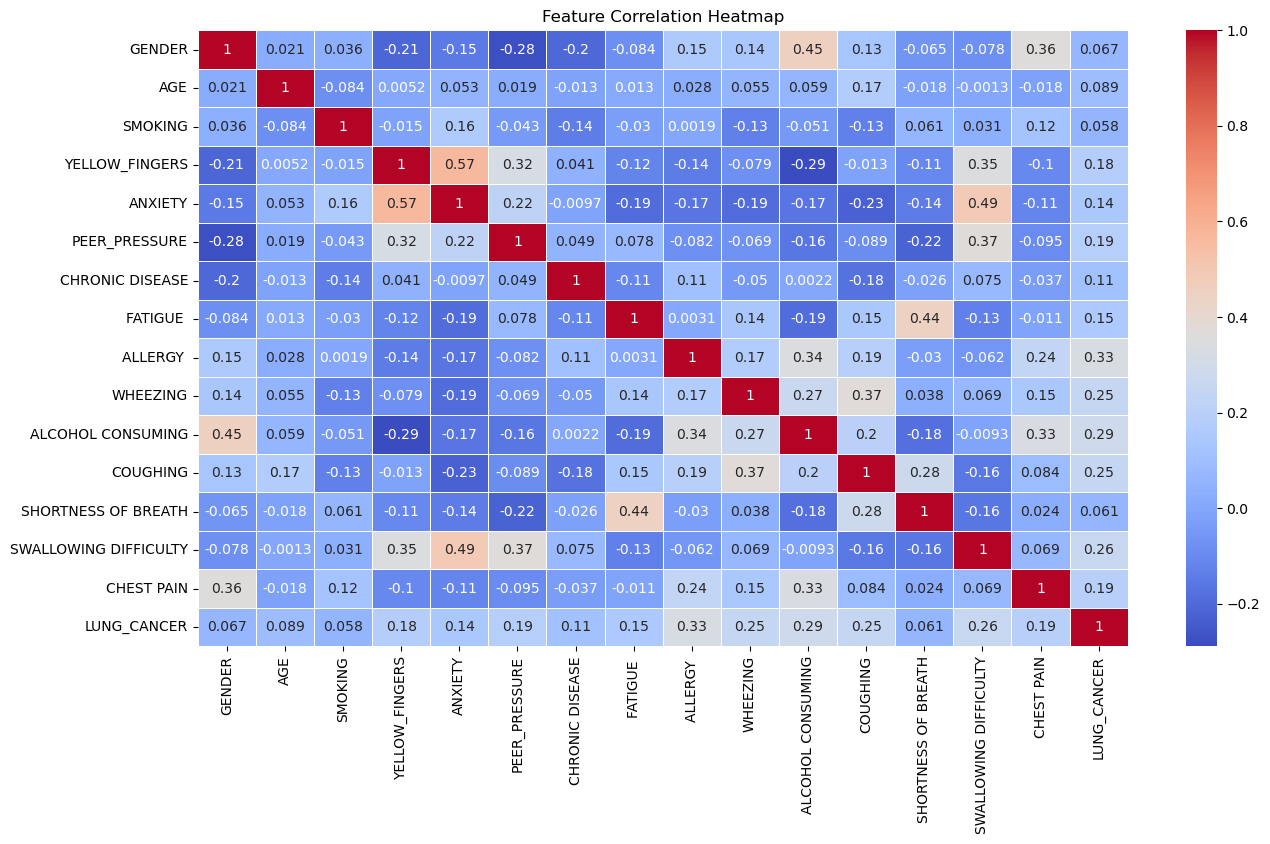

In [274]:
plt.figure(figsize=(15, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

# If we want,we can test out model with different DataFrame.Just Call any from the trained Algorithms.
#### Example : new_data = [DataFrame]
#### new_prediction = rfc/xgb/lr/dtc/knn.predict(new_data)